<a href="https://colab.research.google.com/github/amirrhseiin/LIF/blob/main/LIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Constant input

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint

In [ ]:
T       =   1000.00000                  
dt      =   0.0005                   
time    =   np.arange(0, T+dt, dt)       
t_spike =   []           
I_spike =   []           
F_spike =   []
R       =    10
t_m     =    100
u_rest  =    -70
I       =    np.zeros(len(time))
V       =    np.empty(len(time))
V[0]    =    0
U       =    np.empty(len(time))
firing_threshold = -50

In [ ]:
def init_variables():
    global t_spike
    t_spike =   []
    global I_spike
    I_spike =   []
    global I      
    I = np.zeros(len(time))
    global V      
    V = np.empty(len(time))
    V[0] = 0
    global U 
    U = np.empty(len(time))

In [ ]:
def enter_I(start_time, end_time, I_input):
    start  = int(start_time/dt)
    end = int(end_time/dt)
    n = int(T/dt)
    
    if start > n:
        start = n+1
        
    if end > n:
        end = n+1
    
    I[start:end]  =  I[start:end] + I_input

In [ ]:
def simulate():  
    counter = 0
    global U
    t0 = time[0]
    for i,t in enumerate(time):
        V[i] = R * I[i] *(1 - np.exp((-(t-t0)/t_m)))
        temp = V[i] + u_rest
        
        if temp < firing_threshold :
            U[i] = temp
        else:
            U[i] = u_rest
            counter += 1
            if counter == 2:
                t_spike.append(t-t0)
                I_spike.append(I[i])
            t0 = t

In [ ]:
def make_dataframe():
    data = pd.DataFrame(data = {'u': U , 'time':time , 'I':I})
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data

In [ ]:
def plot(data):
    
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line', y='u', color='red' ,title = 'U-time', figsize=(15,5)).set_ylabel('U(t)')  
    plt.axhline(y=firing_threshold, color='black', linestyle='--')
    
    plt.show()

    f2 = data.plot(kind='line' ,y='I' ,color='blue' ,title = 'I-time' ,figsize=(15,5)).set_ylabel('I(t)')

<Figure size 1800x1080 with 0 Axes>

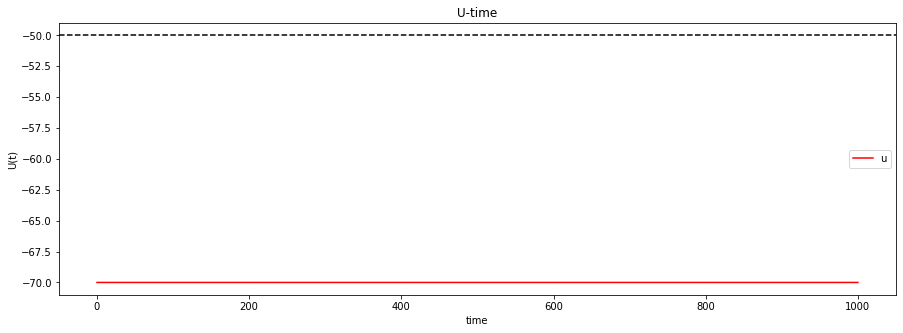

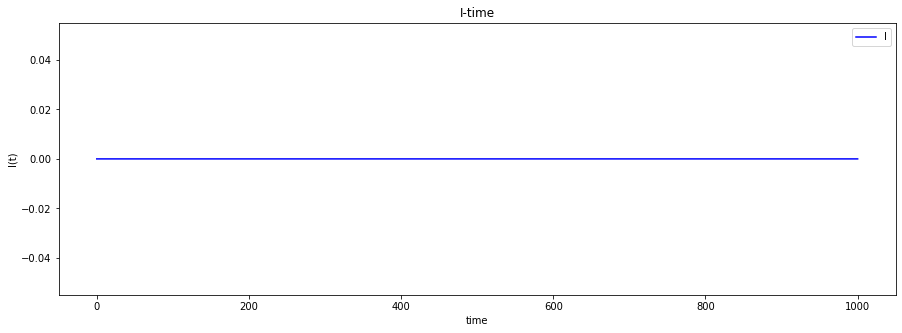

In [ ]:
init_variables()
enter_I(0,T+dt,0)
simulate()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

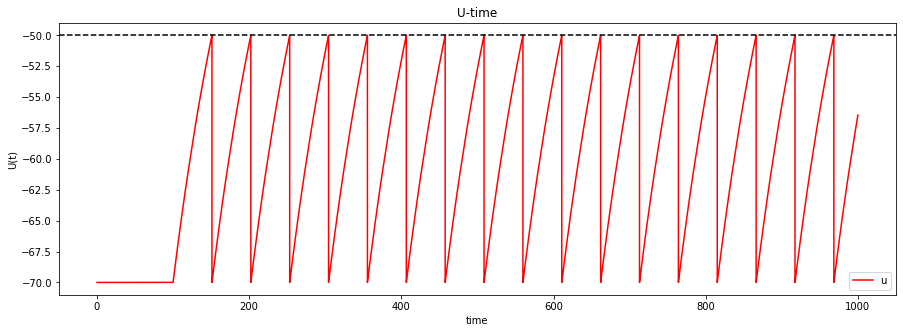

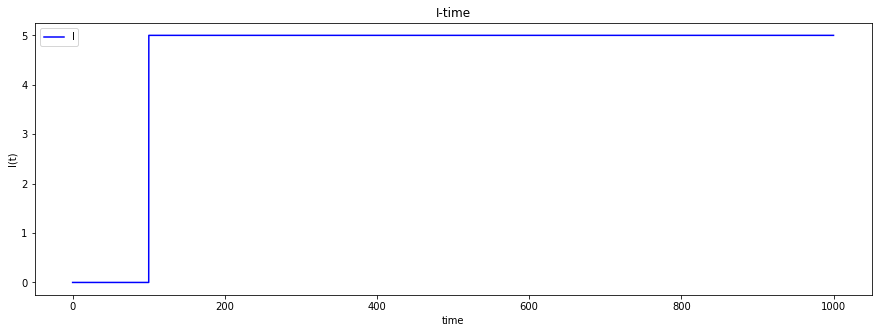

In [ ]:
init_variables()
enter_I(100,T+dt,5)
simulate()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

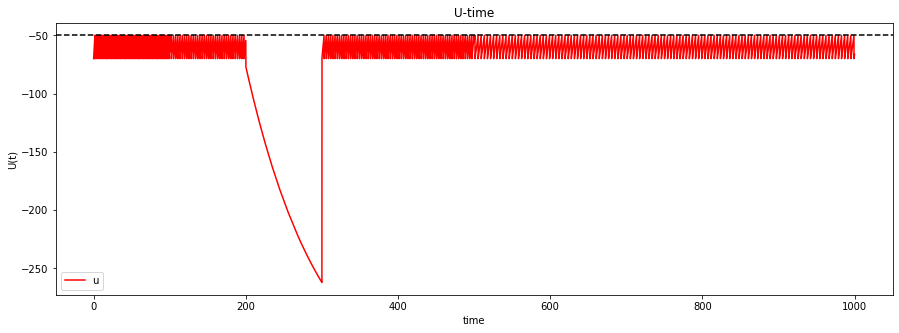

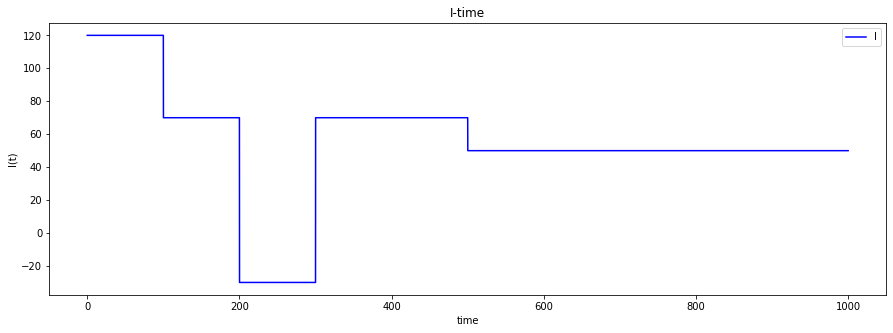

In [ ]:
init_variables()
enter_I(0,T+dt,120)
enter_I(100,500,20)
enter_I(200,300,-100)
enter_I(100,T+dt,-70)
simulate()
data = make_dataframe()
plot(data)

In [ ]:
init_variables()
enter_I(10,T+dt,1)
simulate()
data1 = make_dataframe()

init_variables()
enter_I(20,T+dt,3)
simulate()
data2 = make_dataframe()

init_variables()
enter_I(40,T+dt,6)
simulate()
data3 = make_dataframe()

init_variables()

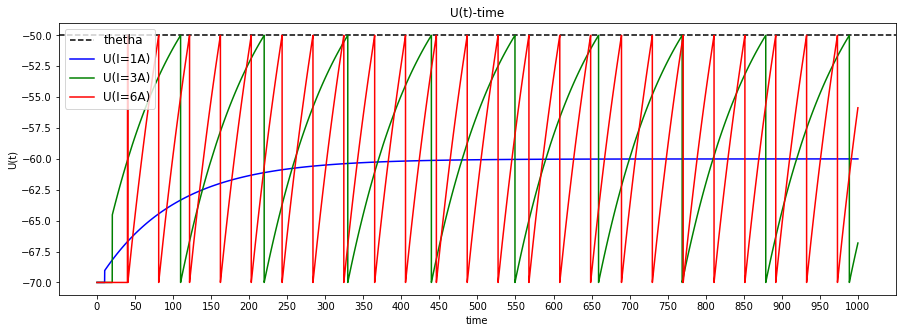

In [ ]:
ax = plt.gca(title = 'U(t)-time')
plt.axhline(y=firing_threshold , color='black', linestyle='--')
data1.plot(kind='line',y='u',color='blue',ax=ax,figsize=(15,5) ,xticks= range(0,1050,50)).set_ylabel('U(t)')
data2.plot(kind='line',y='u', color='green', ax=ax)
data3.plot(kind='line',y='u', color='red', ax=ax)
ax.legend(["thetha","U(I=1A)", "U(I=3A)" , "U(I=6A)"],prop={'size': 12},loc='upper left')

plt.show()

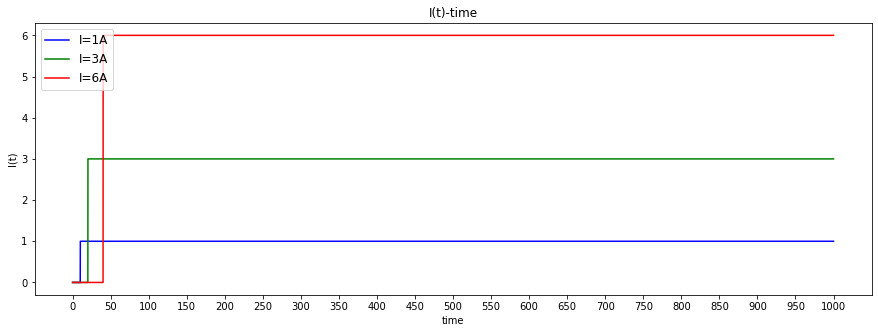

In [ ]:
ax = plt.gca(title = 'I(t)-time')
data1.plot(kind='line',y='I',color='blue',ax=ax ,figsize=(15,5),yticks= range(0,10,1),xticks= range(0,1050,50)).set_ylabel('I(t)')
data2.plot(kind='line',y='I', color='green', ax=ax)
data3.plot(kind='line',y='I', color='red', ax=ax)

ax.legend(["I=1A", "I=3A" , "I=6A"],prop={'size': 12},loc='upper left')

plt.show()

In [ ]:
def plot_F_I(list_t_spike,list_I_spike):
    start_s = 0
    for items in list_t_spike:
        if items != 0:
            start_s = items
            break
    fig = plt.figure(figsize=(10,5))
    plt.axhline(y=start_s, color='black', linestyle='--')
    plt.plot(list_I_spike ,list_t_spike)
    fig.suptitle('F-I chart', fontsize=20)
    plt.xlabel('I', fontsize=18)
    plt.ylabel('F', fontsize=16)
    plt.show()

In [ ]:
list_data = []
list_I_spike = []
list_t_spike = []
for i in range(0,30):
    init_variables()
    enter_I(0,T+dt,0 +(i/10))
    simulate()
    data = make_dataframe()
    list_data.append(data)
    if len(t_spike)>0:
        list_t_spike.append(round(1/t_spike[0],3))
        list_I_spike.append(I_spike[0])
    elif len(t_spike)== 0:
        list_t_spike.append(0)
        list_I_spike.append(round(0 +(i/10),3))

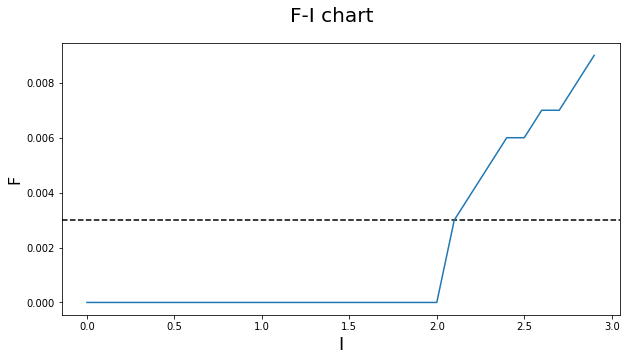

In [ ]:
plot_F_I(list_t_spike,list_I_spike)

Aribtrary input


In [ ]:
T       =   2.00000                    
dt      =   0.01                       
time    =   np.arange(0, T+dt, dt)        


R       =    100
t_m     =    25

u_rest  =    -70

I       =    np.zeros(len(time))

U       =    np.empty(len(time)+1)
U[0]    =    u_rest

thetha  =    -50

In [ ]:
def init_variables_arbitrary():
    global I
    global U

    I       =    np.zeros(len(time))
    U       =    np.empty(len(time)+1) 
    U[0]    =    u_rest

In [ ]:
def simulate_arbitrary():
    t0 = time[0]
    for i,t in enumerate(time):
        U[i+1] = U[i] + (dt/t_m)*(-(U[i]- u_rest) + R*I[i])
        if U[i+1] > thetha:
            U[i+1] = u_rest

In [ ]:
def enter_I_arbitrary(start_time, end_time, I_input):
    start  = int(start_time/dt)
    end = int(end_time/dt)
    n = int(T/dt)
    
    if start > n:
        start = n+1
        
    if end > n:
        end = n+1
    
    I[start:end]  =  I[start:end] + I_input

In [ ]:
def make_dataframe_arbitrary():
    data = pd.DataFrame(data = {'u': U[0:U.size - 1] , 'time':time , 'I':I})
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data

In [ ]:
def plot_arbitrary(data):
    
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line',y='u',color='red'
            ,title = 'U-time',figsize=(15,5)).set_ylabel('U(t)')  
    plt.axhline(y=thetha, color='black', linestyle='--')
    
    plt.show()

    f2 = data.plot(kind='line',y='I',color='blue'
            ,title = 'I-time',figsize=(15,5)).set_ylabel('I(t)')

<Figure size 1800x1080 with 0 Axes>

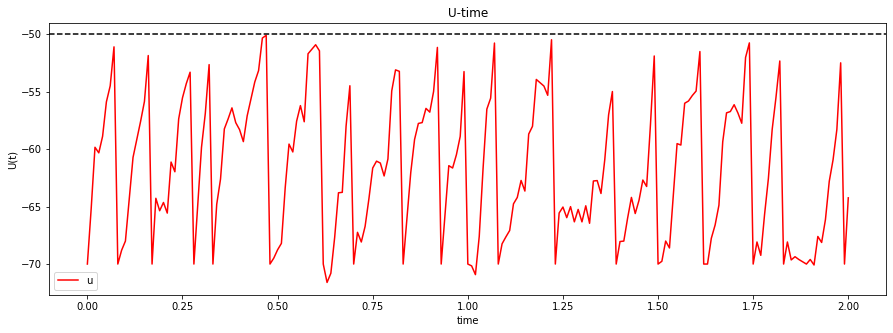

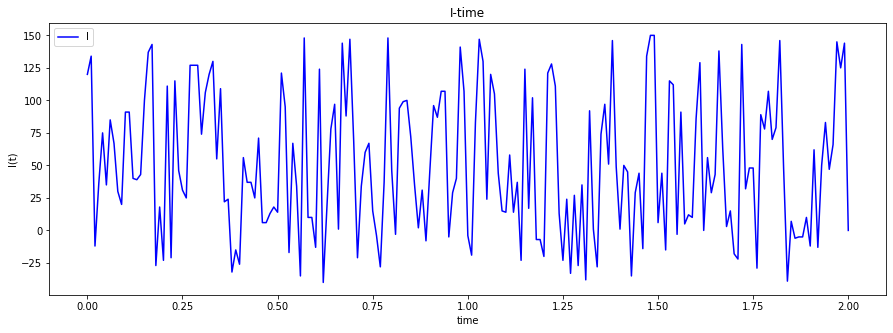

In [ ]:
init_variables_arbitrary()
n = 1
for i in range(0,int(T/(n*dt))):
    I_random = round(randint(-40,150),3)
    enter_I_arbitrary(round(i*(n*dt),4),round((i+1)*(n*dt),4),I_random)
simulate_arbitrary()
data = make_dataframe_arbitrary()
plot_arbitrary(data)

